<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TD-Prediction" data-toc-modified-id="TD-Prediction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>TD Prediction</a></span></li><li><span><a href="#Advantages-of-TD-Prediction-Methods" data-toc-modified-id="Advantages-of-TD-Prediction-Methods-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Advantages of TD Prediction Methods</a></span></li><li><span><a href="#Optimality-of-TD(0)" data-toc-modified-id="Optimality-of-TD(0)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Optimality of TD(0)</a></span></li></ul></div>

# Temporal Difference Learning (TD)

TD learning is a combination of Monte Carlo ideas and dynamic programming (DP) ideas. Like Monte Carlo methods, TD methods can learn directly from raw experience without a model of the environment’s dynamics. Like DP, TD methods update estimates based in part on other learned estimates, without waiting for a final outcome (they bootstrap).

## TD Prediction

Both TD and Monte Carlo methods use experience to solve the prediction problem. Given some experience following a policy $\pi$, both methods update their estimate V of $v_\pi$ for the nonterminal states $S_t$ occurring in that experience. Roughly speaking, Monte Carlo methods wait until the return following the visit is known, then use that return as a target for $V(S_t)$. A simple every-visit Monte Carlo method suitable for nonstationary environments is;

$$ V(S_t) \leftarrow V(S_t) + \alpha [G_t-V(S_t)] $$

where $G_t$ is the actual return following time t, and $\alpha$ is a constant step-size parameter Let us call this method constant-$\alpha$ MC. Whereas Monte Carlo methods must wait until the end of the episode to determine the increment to $V(S_t)$, TD methods need to wait only until the next time step. At time t + 1 they immediately form a target and make a useful update using the observed reward $R_{t+1}$ and the estimate $V(S_{t+1})$. The simplest TD method makes the update:

$$ V(S_t) \leftarrow V(S_t) +\alpha[R_{t+1}+\gamma V(S_{t+1})-V(S_t)] $$

This TD method is called $TD(0)$, or one-step TD, because it is a special case of the TD($\lambda$) and n-step TD methods.



Because TD(0) bases its update in part on an existing estimate, we say that it is a
bootstrapping method.

Finally, note that the quantity in brackets in the TD(0) update is a sort of error, measuring the di↵erence between the estimated value of $S_t$ and the better estimate $R_{t+1} + \gamma V(S_{t+1})$. This quantity, called the TD error, arises in various forms throughout reinforcement learning:

$$ \delta_t = R_{t+1} + \gamma V(S_{t+1})-V(S_t) $$

## Advantages of TD Prediction Methods

TD methods have an advantage over DP methods in that they do not
require a model of the environment, of its reward and next-state probability distributions.
The next most obvious advantage of TD methods over Monte Carlo methods is that
they are naturally implemented in an online, fully incremental fashion. With Monte
Carlo methods one must wait until the end of an episode, because only then is the return
known, whereas with TD methods one need wait only one time step. Surprisingly often
this turns out to be a critical consideration. Some applications have very long episodes, so
that delaying all learning until the end of the episode is too slow. Other applications are
continuing tasks and have no episodes at all. Finally, as we noted in the previous chapter,
some Monte Carlo methods must ignore or discount episodes on which experimental
actions are taken, which can greatly slow learning. TD methods are much less susceptible
to these problems because they learn from each transition regardless of what subsequent
actions are taken.

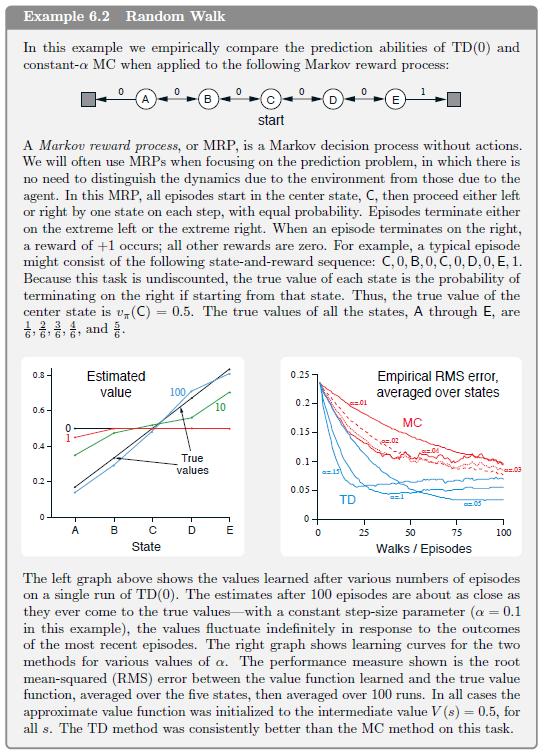

## Optimality of TD(0)